DAY 4

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:\Users\Johnny\Documents\TDI\Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [4]:
# 1 Number of different companies

comp_list = data['Company Name'].unique()

print("The number of companies in the file is", len(comp_list))


The number of companies in the file is 439


In [5]:
# 2 Total number of jobs created in Queens

q_list = data[data['City'] == 'Queens']
num_jobs = q_list[['Job created']].sum()

print("The number of jobs created in Queens is", int(num_jobs))

The number of jobs created in Queens is 90


In [6]:
# 3 Unique email domains

e_list = data[['company email']].dropna()
u_list = e_list['company email'].unique()
dom_list = []

for ii in range(len(u_list)):
    yy = u_list[ii]
    xx = yy.find('@')
    if yy[xx+1:] in dom_list:
        continue
    else:
        dom_list.append(yy[xx+1:])

print("The number of unique email domains is", int(len(dom_list)))

The number of unique email domains is 361


In [7]:
# 4 NTA's with at least 5 businesses

n_list = data['NTA'].unique()
names = pd.DataFrame()

for kk in range(len(n_list)):
    p = data[data['NTA'] == n_list[kk]]
    if len(p) > 4:
        names = pd.concat([names,p], ignore_index = False)
        print("NTA Name:", n_list[kk], ", Avg Total Savings: $", int(p['Total Savings'].sum())/len(p), 
        ", Jobs created:",int(p['Job created'].sum()))
names.to_csv('day4.csv')

NTA Name: SoHo-TriBeCa-Civic Center-Little Italy , Avg Total Savings: $ 37214.0 , Jobs created: 0
NTA Name: Battery Park City-Lower Manhattan , Avg Total Savings: $ 469890.77777777775 , Jobs created: 0
NTA Name: Sunset Park West , Avg Total Savings: $ 14316.958333333334 , Jobs created: 0
NTA Name: Hunters Point-Sunnyside-West Maspeth , Avg Total Savings: $ 23931.386666666665 , Jobs created: 0
NTA Name: College Point , Avg Total Savings: $ 17159.285714285714 , Jobs created: 2
NTA Name: Carroll Gardens-Columbia Street-Red Hook , Avg Total Savings: $ 24337.363636363636 , Jobs created: 0
NTA Name: Steinway , Avg Total Savings: $ 11227.142857142857 , Jobs created: 20
NTA Name: DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill , Avg Total Savings: $ 59950.3 , Jobs created: 0
NTA Name: Hunts Point , Avg Total Savings: $ 39246.0 , Jobs created: 12
NTA Name: Bushwick South , Avg Total Savings: $ 26140.4 , Jobs created: 10
NTA Name: Manhattanville , Avg Total Savings: $ 2760.8888888888887 , Jobs 

DAY 5

In [8]:
dnta = pd.read_csv(r'C:\Users\Johnny\Documents\TDI\day4.csv')

Text(0, 0.5, 'Jobs Created')

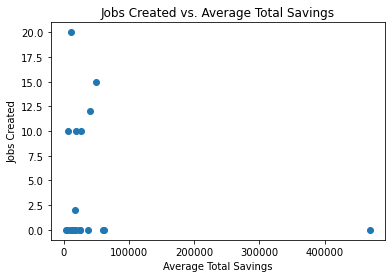

In [29]:
# 1. scatter plot of jobs created vs. average savings

j_list = []
a_list = []
# remember that n_list contains the names of the correlating NTA's

for kk in range(len(n_list)):
    p = data[data['NTA'] == n_list[kk]]
    if len(p) > 4:
        j_list.append(int(p['Job created'].sum()))
        a_list.append(int(p['Total Savings'].sum())/len(p))
        #print("NTA Name:", n_list[kk], ", Avg Total Savings: $", int(p['Total Savings'].sum())/len(p), 
        #", Jobs created:",int(p['Job created'].sum()))
fig, ax = plt.subplots(1)
ax.scatter(a_list,j_list,marker='o')
ax.set_title('Jobs Created vs. Average Total Savings')
ax.set_xlabel('Average Total Savings')
ax.set_ylabel('Jobs Created')

Text(0, 0.5, 'Jobs Created')

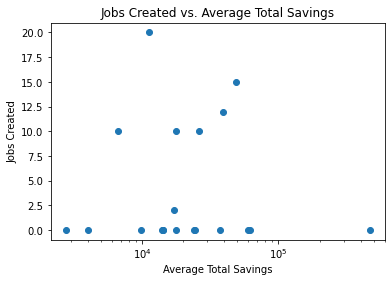

In [43]:
# logarithmic scale
fig, bx = plt.subplots(1)
bx.scatter(a_list,j_list,marker='o')
plt.xscale('log')
bx.set_title('Jobs Created vs. Average Total Savings')
bx.set_xlabel('Average Total Savings')
bx.set_ylabel('Jobs Created')


Text(0.5, 0, 'Average Total Savings')

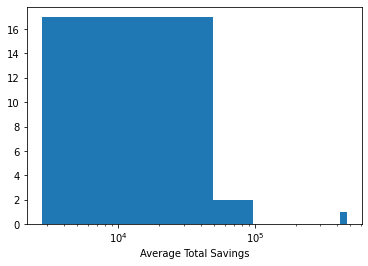

In [44]:
# histogram

fig, cx = plt.subplots(1)
cx.hist(a_list,)
plt.xscale('log')
cx.set_xlabel('Average Total Savings')

Text(0, 0.5, 'Jobs Created')

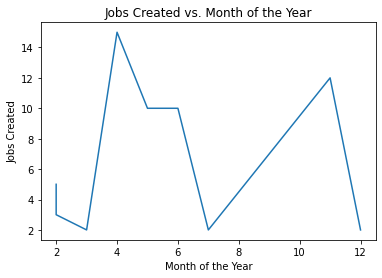

In [147]:
# line plot

jdata = dnta[dnta['Job created'] > 0]
mdata = jdata['Effective Date']

m_list =[]
o_list =[]

for jj in range(len(mdata)):
    pp = mdata.iloc[jj]
    m_list.append(int(pp[:pp.find('/')]))
    o_list.append(int(jdata[['Job created']].iloc[jj]))

    
mindex = []
for kk in range(len(m_list)):
    mindex.append(m_list[kk])

m_list.sort()

nnuumm = []
for mm in range(len(m_list)):
    nnuumm.append(m_list.index(mindex[mm]))

bnn = []    
for nn in range(len(nnuumm)):
    bnn.append(o_list[nnuumm[nn]])
    
    
fig, pp = plt.subplots(1)
plt.plot(m_list, bnn)
pp.set_title('Jobs Created vs. Month of the Year')
pp.set_xlabel('Month of the Year')
pp.set_ylabel('Jobs Created')

[5, 7, 2, 12, 11, 4, 6, 3, 2]

[2, 20, 12, 10, 5, 2, 3, 10, 15]

[4, 6, 0, 8, 7, 3, 5, 2, 0]

[5, 3, 2, 15, 10, 10, 2, 12, 2]

[2, 2, 3, 4, 5, 6, 7, 11, 12]

[5, 7, 2, 12, 11, 4, 6, 3, 2]